
# Progetto d'esame
## Preprocessing
Nella prima fase, una volta caricato il dataframe, è necessario visualizzare i dati per effettuare una corretta pulizia dei dati in particolare:
* Ricercare ed eliminare eventuali Missing values.
* Trascurare possibili colonne ininfluenti al livello dell'analisi dati.

### Pacchetti utilizzati

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import ipywidgets as widgets
%matplotlib widget
import warnings

warnings.filterwarnings("ignore")


In [2]:
covid_filepath = "/Users/andreasvizzeretto/Doc/Magistrale/DATA SCIENCE/Esame/dataset_exam.csv"
covid_data = pd.read_csv(covid_filepath, index_col=0)
covid_data

City        lat        lng  Population  Density  Surface  \
0           Acquasparta  42.691173  12.546451        4611    57.00    81.61   
1              Allerona  42.812033  11.973053        1722    21.00    82.61   
2               Alviano  42.588208  12.295936        1428    60.00    23.90   
3                Amelia  42.553528  12.416776       11852    89.00   132.50   
4                Arrone  42.583433  12.769865        2703    66.00    41.04   
..                  ...        ...        ...         ...      ...      ...   
87  Tuoro_sul_Trasimeno  43.206848  12.074615        3810    68.00    55.89   
88            Umbertide  43.305636  12.336622       16598    83.00   200.83   
89          Valfabbrica  43.158897  12.600896        3286    36.00    92.30   
90        Vallo_di_Nera  42.754621  12.863760         357     9.86    36.22   
91            Valtopina  43.058282  12.754656        1325    33.00    40.57   

    Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0     1.013507                        6                             1   
1    -1.309272                        3                             1   
2    -2.148882                        2                             1   
3    -0.832084                        5                             1   
4    -0.479919                        7                             1   
..         ...                      ...                           ...   
87   -1.037773                        0                             0   
88    1.316157                       29                             4   
89    0.868986                        8                             3   
90    1.624309                        0                             0   
91    2.122164                        1                             0   

    AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_std_2019  \
0                       0.273585  ...                  7.288500   
1                       0.336735  ...                  7.038712   
2                       0.252632  ...                  8.908002   
3                       0.317308  ...                  7.749981   
4                       0.475728  ...                  7.416702   
..                           ...  ...                       ...   
87                      0.000000  ...                  8.044015   
88                      1.010526  ...                  8.024829   
89                      0.473684  ...                  7.626592   
90                      0.000000  ...                  7.429745   
91                      0.000000  ...                  7.245096   

    mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019  \
0                     14.674647                   27.591324   
1                     14.752206                   26.312595   
2                     19.626043                   30.008255   
3                     16.706606                   31.103338   
4                     12.388708                   26.191957   
..                          ...                         ...   
87                    16.669778                   26.659630   
88                    15.469442                   31.068005   
89                    14.094612                   25.738884   
90                    10.847563                   21.805939   
91                    12.358014                   22.791494   

    max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019  \
0                  31.958118                15.960667   
1                  30.565736                18.320679   
2                  34.685780                17.674601   
3                  36.154165                19.364122   
4                  32.194737                20.364874   
..                       ...                      ...   
87                 30.684311                16.006453   
88                 38.008366                23.129139   
89                 29.684339                16.050027   
90                 26.849045                15.005412   
91  

In [3]:
covid_data.describe()

lat        lng     Population     Density     Surface  \
count  92.000000  92.000000      92.000000   92.000000   92.000000   
mean   42.905182  12.472221    9568.315217   89.459565   92.003804   
std     0.273627   0.292700   22012.983364  108.091455   96.297586   
min    42.403124  11.973053      96.000000    2.390000   10.000000   
25%    42.703714  12.234268    1573.750000   32.000000   35.735000   
50%    42.873417  12.481221    2946.500000   66.500000   58.935000   
75%    43.073766  12.718593    6913.500000  108.000000   97.267500   
max    43.548980  13.092928  166969.000000  787.000000  525.780000   

       Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
count   92.000000                92.000000                     92.000000   
mean    -0.455099                15.054348                      2.673913   
std      1.357775                39.688447                      6.293392   
min     -5.251338                 0.000000                      0.000000   
25%     -1.204914                 0.000000                      0.000000   
50%     -0.492604                 5.000000                      1.000000   
75%      0.351280                11.000000                      3.000000   
max      2.872051               332.000000                     51.000000   

       AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  ...  \
count                     92.000000              92.000000  ...   
mean                       0.801545               0.826087  ...   
std                        1.988844               2.094518  ...   
min                        0.000000               0.000000  ...   
25%                        0.000000               0.000000  ...   
50%                        0.185896               0.000000  ...   
75%                        0.853774               1.000000  ...   
max                       14.971698              14.000000  ...   

       mean_pm10_ug/m3_median_jan_jun_2020.1  mean_pm10_ug/m3_mean_2019  \
count                              92.000000                  92.000000   
mean                               14.475831                  16.430487   
std                                 3.014723                   2.620349   
min                                 7.420084                  10.744741   
25%                                12.673209                  14.608065   
50%                                15.098714                  16.623700   
75%                                16.377223                  18.087417   
max                                21.254544                  22.373268   

       mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019  \
count                 92.000000                    92.000000   
mean                   7.788327                    14.892218   
std                    0.571131                     2.769346   
min                    6.939437                     8.817261   
25%                    7.387661                    12.719118   
50%                    7.648703                    15.328800   
75%                    8.057968                    16.689253   
max                    9.674192                    20.719354   

       max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019  \
count                   92.000000                 92.000000   
mean                    26.885255                 31.688390   
std                      4.958767                  5.724870   
min                     16.463018                 20.667668   
25%                     24.180037                 28.689235   
50%                     26.361343                 30.668131   
75%                     28.995770                 34.065552   
max                     48.968746                 56.453095   

       max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019  \
count                92.000000                   92.000000   
mean                 17.816801                    6.811227   
std                   4.342591                    2.446697   
min                  11.

Il dataframe è composto da 91 righe, quindi 92 campionamenti, per 36 colonne ossia features. Nello specifico sono presenti dei dati relativi ai comuni umbri di carattere epidemiologico ('CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020', 'AvgHospitalized_jan_jun_2020','Deceased_jan_jun_2020','MaxIntensiveCare_jan_jun_2020'
,'AvgIntensiveCare_jan_jun_2020') affiancati da coordinate geografiche ('lat', 'lng', 'Surface') e corrispondenti dati demografici ('Population', 'Density', 'Depriv_idx'). Sono presenti inoltre delle analisi concernenti il particolato atmosferico pm10. 

Tutti i dati epidemiologici si riferiscono al periodo tra Gennaio e Giugno del 2020, perciò il primo periodo della pandemia, mentre per il pm10 il periodo di riferimento è in parte Gennaio-Giugno 2020, in parte Gennaio-Giugno 2019.

Come primo task è importante verificare se sono presenti dei Missing values (NaN) ed eventualmente eliminarli dalle colonne corrispondenti. I Missing values possono essere problematici nel momento in cui si vuole applicare un modello previsionale. (PERCHÈ?)

In [4]:
cols_with_missing = [col for col in covid_data.columns
                     if covid_data[col].isnull().any()]
print(cols_with_missing)

['min_pm10_ug/m3_std_2019', 'Region']


Sono presenti dei Missing values nelle colonne "min_pm10_ug/m3_std_2019" e "Region".

In [5]:
print(covid_data.isnull().sum())
print(covid_data.isnull().sum().sum())

City                                     0
lat                                      0
lng                                      0
Population                               0
Density                                  0
Surface                                  0
Depriv_idx                               0
CovidCases_jan_jun_2020                  0
MaxHospitalized_jan_jun_2020             0
AvgHospitalized_jan_jun_2020             0
Deceased_jan_jun_2020                    0
MaxIntensiveCare_jan_jun_2020            0
AvgIntensiveCare_jan_jun_2020            0
mean_pm10_ug/m3_mean_jan_jun_2020        0
mean_pm10_ug/m3_std_jan_jun_2020         0
mean_pm10_ug/m3_median_jan_jun_2020      0
max_pm10_ug/m3_mean_jan_jun_2020         0
max_pm10_ug/m3_std_jan_jun_2020          0
max_pm10_ug/m3_median_jan_jun_2020       0
min_pm10_ug/m3_mean_jan_jun_2020         0
min_pm10_ug/m3_std_jan_jun_2020          0
min_pm10_ug/m3_median_jan_jun_2020       0
mean_pm10_ug/m3_mean_jan_jun_2020.1      0
mean_pm10_u

In particolare sono presenti due missing values, uno nella colonna "min_pm10_ug/m3_std_2019" e uno in "Region".
Per trattarli, dal momento che in "Region" si ha come unico valore 'Umbria', è possibile trascurare tale colonna, poichè non contiene alcuna informazione aggiuntiva. Infatti:

In [6]:
print(covid_data['Region'].unique())

['Umbria' nan]


Per ciò concerne la colonna che contiene l'informazione sul pm10, anch'essa può essere trascurata così come anche tutte quelle relative al 2019, dal momento che i dati epidemiologi si riferiscono tutti al 2020.

È utile creare quindi una lista contenente le colonne da escludere dal dataframe:

In [7]:

columns_to_drop= ['Region','mean_pm10_ug/m3_mean_jan_jun_2020.1',
                  'mean_pm10_ug/m3_std_jan_jun_2020.1',
                  'mean_pm10_ug/m3_median_jan_jun_2020.1',
                  'mean_pm10_ug/m3_mean_2019',
                  'mean_pm10_ug/m3_std_2019', 
                  'mean_pm10_ug/m3_median_2019', 
                  'max_pm10_ug/m3_median_2019',
                  'max_pm10_ug/m3_mean_2019',
                  'max_pm10_ug/m3_std_2019',
                  'min_pm10_ug/m3_median_2019',
                  'min_pm10_ug/m3_mean_2019',
                  'min_pm10_ug/m3_std_2019'
                  ]
covid_data=covid_data.drop(columns_to_drop, axis=1)


A questo punto il dataframe si presenta così:

In [8]:
covid_data.head()

City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                      0.273585  ...                          16.448845   
1                      0.336735  ...                          16.009011   
2                      0.252632  ...                          22.556083   
3                      0.317308  ...                          18.391294   
4                      0.475728  ...                          13.751943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          7.735424                            15.089290   
1                          8.708984                            14.280218   
2                         11.939011                            19.562969   
3                          8.453660                            16.210499   
4                          6.993753                            12.296421   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                         33.836615                        17.647870   
1                         33.495723                        24.558868   
2                         38.183899                        20.920174   
3                         36.719376                        16.893413   
4                         33.302903                        21.477547   

   max_pm10_ug/m3_median_jan_jun_2020  min_pm10_ug/m3_mean_jan_jun_2020  \
0                           29.368190                          7.261863   
1                           27.071611                          5.148148   
2                           32.187719                          9.650757   
3                           32.944553                          7.836244   
4                           27.722733                          4.484330   

   min_pm10_ug/m3_std_jan_jun_2020  min_pm10_ug/m3_median_jan_jun_2020  \
0                         4.781904                            5.875184   
1                         3.295273                            4.329871   
2                         5.429373                            8.142606   
3                         4.633759                            6.741657   
4                         4.012669                            3.460392   

                  Zone  
0  collinare e montana  
1  collinare e montana  
2  collinare e montana  
3  collinare e montana  
4  collinare e montana  

[5 rows x 23 columns]

In [9]:
covid_data.columns

Index(['City', 'lat', 'lng', 'Population', 'Density', 'Surface', 'Depriv_idx',
       'CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020',
       'AvgHospitalized_jan_jun_2020', 'Deceased_jan_jun_2020',
       'MaxIntensiveCare_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020',
       'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',
       'mean_pm10_ug/m3_median_jan_jun_2020',
       'max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020',
       'max_pm10_ug/m3_median_jan_jun_2020',
       'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020',
       'min_pm10_ug/m3_median_jan_jun_2020', 'Zone'],
      dtype='object')

Al fine di studiare le dipendenze che legano le variabili di carattere epidemiologico a quelle di carattere demografico e geografico, creiamo delle liste separando per macrocategorie le seguenti variabili:
* 'Population' 
* 'Density'
* 'Depriv_idx'
* 'lat'
* 'lng'
* 'Surface'
* 'CovidCases_jan_jun_2020'
* 'MaxHospitalized_jan_jun_2020'
* 'AvgHospitalized_jan_jun_2020'
* 'Deceased_jan_jun_2020'
* 'MaxIntensiveCare_jan_jun_2020'
* 'AvgIntensiveCare_jan_jun_2020'


In [10]:
demography = ['Population', 'Density', 'Depriv_idx']
geography = ['lat', 'lng', 'Surface']
epidemiology = ['CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020', 'AvgHospitalized_jan_jun_2020','Deceased_jan_jun_2020','MaxIntensiveCare_jan_jun_2020'
,'AvgIntensiveCare_jan_jun_2020'] 


In [11]:
columns=['lat', 'lng', 'Population', 'Density', 'Surface', 'Depriv_idx',
       'CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020',
       'AvgHospitalized_jan_jun_2020', 'Deceased_jan_jun_2020',
       'MaxIntensiveCare_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020',
       'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',
       'mean_pm10_ug/m3_median_jan_jun_2020',
       'max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020',
       'max_pm10_ug/m3_median_jan_jun_2020',
       'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020',
       'min_pm10_ug/m3_median_jan_jun_2020']

## Analisi grafica
Per poter studiare la correlazione tra queste varie macrocategorie è utile costruire una *heatmap* che ci permette di visionare i vari valori dell'indice di correlazione tra le diverse features. L'indice di correlazione varia nell'intervallo [-1,1], avvicinandosi agli estremi l'interazione fra le variabili cresce.

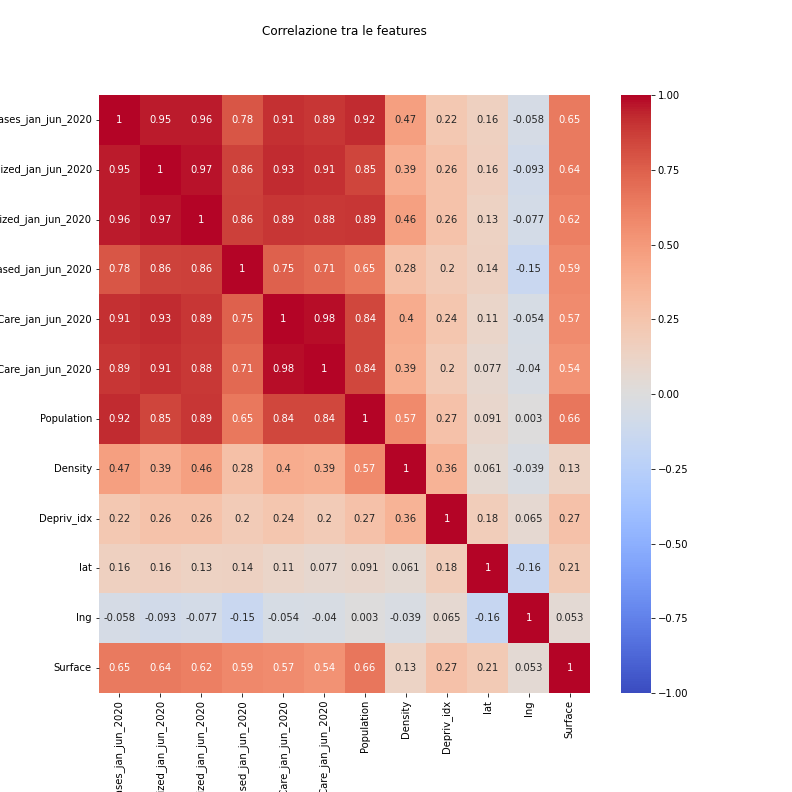

In [12]:

correlation=epidemiology + demography + geography 
plt.figure(figsize=(11,11))
features_corr= covid_data[correlation]
sns.heatmap(features_corr.corr(),vmin=-1,cmap="coolwarm",annot=True)
plt.title('Correlazione tra le features', pad = 60)
plt.show()


Un altro modo utile per studiare graficamente la correlazione delle features è quella di costruire uno *scatter plot* tra due features in particolare. Di seguito è riportato un grafico di questo tipo in cui è possibile selezionare la variabile epidemiologica  sull'asse delle y. Quest'ultima è confrontata in tre scatter plot indipendenti con le tre variabili geografiche:

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def create_scatter1(feature):
    fig = make_subplots(rows=1, cols=3)

    fig.add_trace(
    go.Scatter(x=covid_data['lat'], y=covid_data[feature],mode='markers',hovertext=covid_data['City'],name='Lat'),
    row=1, col=1
    )

    fig.add_trace(
    go.Scatter(x=covid_data['lng'], y=covid_data[feature],mode='markers',hovertext=covid_data['City'],name='Lng'),
    row=1, col=2
    )
    

    fig.add_trace(
    go.Scatter(x=covid_data['Surface'], y=covid_data[feature],mode='markers',hovertext=covid_data['City'],name='Surface'),
    row=1, col=3
    )
    fig.update_layout(autosize=True, title_text="Epidemiology vs Geography", yaxis_title=feature,margin=dict(
        l=100,
        r=100,
        b=100,
        t=100,
        pad=4
    ))


    fig.show()
widgets.interact(create_scatter1,feature=epidemiology)

interactive(children=(Dropdown(description='feature', options=('CovidCases_jan_jun_2020', 'MaxHospitalized_jan…

<function __main__.create_scatter1(feature)>

Per analizzare meglio anche l'interazione tra epidemiologia e demografia è necessario costruire lo stesso set di grafici. Sulla x in questo caso si trovano le variabili di carattere demografico:

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def create_scatter2(feature):
    fig = make_subplots(rows=1, cols=3)

    fig.add_trace(
    go.Scatter(x=covid_data['Population'], y=covid_data[feature],mode='markers',hovertext=covid_data['City'],name='Population'),
    row=1, col=1
    )

    fig.add_trace(
    go.Scatter(x=covid_data['Density'], y=covid_data[feature],mode='markers',hovertext=covid_data['City'],name='Density'),
    row=1, col=2
    )
    

    fig.add_trace(
    go.Scatter(x=covid_data['Depriv_idx'], y=covid_data[feature],mode='markers',hovertext=covid_data['City'],name='Depriv_idx'),
    row=1, col=3
    )
    fig.update_layout(autosize=True, title_text="Epidemiology vs Demography", yaxis_title=feature,margin=dict(
        l=100,
        r=100,
        b=100,
        t=100,
        pad=4
    ))


    fig.show()
widgets.interact(create_scatter2,feature=epidemiology)

interactive(children=(Dropdown(description='feature', options=('CovidCases_jan_jun_2020', 'MaxHospitalized_jan…

<function __main__.create_scatter2(feature)>

È possibile notare come ci sia una non trascurabile correlazione tra epidemiologia e geografia, e epidemiologia e demografia. Infatti il comune di Perugia, il più esteso e il più popolato, presenta numeri molto alti di casi epidemiologici. Subito sotto, in accordo con l'ipotesi di correlazione, si colloca il comune Terni.
Infine il grafico seguente permette di studiare la relazione tra densità, popolazione e un'altra feature, selezionabile, che viene rappresentata da una scala cromatica.

In [16]:


def create_scatter3(feature):
    with plt.style.context("ggplot"):
        scatter=px.scatter(covid_data, x = "Population",
                    y = "Density",
                    color=covid_data[feature],
                    hover_name=covid_data['City']
                   )
        scatter.update_layout(height=600,width=800)         
        scatter.show()
widgets.interact(create_scatter3,feature=covid_data[columns])



interactive(children=(Dropdown(description='feature', options=('lat', 'lng', 'Population', 'Density', 'Surface…

<function __main__.create_scatter3(feature)>

Da quest'ultimo plot invece risalta il comune di Bastia Umbra, che nonostante sia molto denso, quasi 800 abitanti per kilometro quadrat, non ha un valore tanto più alto di casi epidemiologici rispetto a comuni meno densi. Comuni come Città di Castello o Gubbio invece, molto più popolati rispetto a Bastia Umbra ma meno densi, presentano numeri epidemiologici più elevati. Queste differenze dipendono dal grado di correlazione tra le varie feature in gioco.

## Analisi geografica su mappa 

Allo scopo di studiare meglio a livello geografico l'incidenza epidemiologica del covid nel periodo di riferimento è utile importare un file json che permette di ricostruire tutti i vari confini dei comuni umbri e studiare i casi di covid comune per comune. 

La prima mappa rappresenta, tramite il colore, la densità di popolazione per ogni comune. Nella tooltip viene riportata anche la superficie, la popolazione e il nome della città.

In [17]:

import geopandas as gpd

#Importo il file json che contiene i comuni di tutta Italia.
full_data = gpd.read_file('/Users/andreasvizzeretto/Doc/Magistrale/DATA SCIENCE/Esame/limits_IT_municipalities.geojson.json')

#Filtro il file per ottenere solo i dati relativi all'umbria. 
umbria_data = full_data[full_data['reg_name'] == 'Umbria']

#Elimino le colonne non interessanti e riordino i dati.
columns_drop=['op_id', 'name_de', 'name_sl', 'minint_elettorale',	'minint_finloc'	,'name_it','prov_istat_code','prov_istat_code_num','prov_acr','reg_name','reg_istat_code','reg_istat_code_num','opdm_id','com_catasto_code','com_istat_code','com_istat_code_num']
new_umbria_data=umbria_data.drop(columns_drop, axis=1)
umbria_data=new_umbria_data.sort_values('name')
umbria_data=umbria_data.reset_index(drop=True)

#Seleziono la colonna relativa alla geometria dei comuni e li memorizzo in una lista.
geometry=umbria_data['geometry']
covid_data_map=covid_data.copy()

#Aggiungo tale geometria al dataframe originale.
covid_data_map['geometry']=geometry
covid_data_map=gpd.GeoDataFrame(covid_data_map)

#Creo la mappa.
tooltip=['Population','Surface','City','Density']
covid_data_map.explore('Density',cmap='viridis',popup=False,tooltip=tooltip)


In accordo con quanto si è visto nell'ultimo scatter plot il comune di Bastia Umbra è il più denso.
Nella seconda mappa invece si possono osservare i decessi (rappresentati dal colore) e si possono leggere anche i casi di positività, gli ospedalizzati e le terapie intensive.

In [18]:
tooltip=['City','CovidCases_jan_jun_2020','AvgIntensiveCare_jan_jun_2020','AvgHospitalized_jan_jun_2020']
covid_data_map.explore('Deceased_jan_jun_2020',cmap='inferno',popup=False,tooltip=tooltip)

Si può notare che il più alto numero di decessi è associato al comune di Città di Castello. Mentre nel comune di Orvieto è interessante come il numero di decessi è abbastanza elevato nonostante un basso numero di contagi. Questo fenomeno potrebbe essere ricondotto al fatto che l'età media della popolazione in questi comuni è più elevato e quindi sicuramente il covid ha avuto un incidenza maggiore.

## Modellizzazione Unsupervised Learning
### Clusterizzazione
Il dataframe in questione può essere utilizzato per allenare vari modelli predittivi che possono aiutare ad analizzare e a fare previsioni sui nuovi dati relativi magari ad un altro periodo della pandemia, successivo a Gennaio-Giugno 2020.

Il primo approccio è quello dell'apprendimento non supervisionato. In particolare viene eseguita una clusterizzazione attraverso K-means sulle colonne memorizzate dentro la lista *features_kmeans* accanto a quelle appartenenti a *epidemiology*, al fine di studiare (l'incidenza del particolato atmosferico sui casi epidemiologici nei vari comuni) possibili gruppi di appartenenza tra i vari comuni in relazione all'epidemiologia e ai valori di particolato atmosferico. Inoltre le variabili epidemiologiche sono state scalate per i rispettivi valori appartenenti alla popolazione. In questo modo si ottengono dei dati epidemiologici che rispecchiano le carattestiche demografiche di ciascun comune.
Per comodità è stato creato un nuovo dataframe, subset dell'originale.

In [19]:

features_kmeans = ['Depriv_idx','max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020',
                    'max_pm10_ug/m3_median_jan_jun_2020', 'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',
                    'mean_pm10_ug/m3_median_jan_jun_2020', 'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020',
                    'min_pm10_ug/m3_median_jan_jun_2020']
kmeans_data = pd.DataFrame()

for col in epidemiology:
    kmeans_data[col] = covid_data[col]/covid_data["Population"] 


kmeans_data[features_kmeans]= covid_data[features_kmeans]

kmeans_data.head()



CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0                 0.001301                      0.000217   
1                 0.001742                      0.000581   
2                 0.001401                      0.000700   
3                 0.000422                      0.000084   
4                 0.002590                      0.000370   

   AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  \
0                      0.000059               0.000000   
1                      0.000196               0.000000   
2                      0.000177               0.000000   
3                      0.000027               0.000084   
4                      0.000176               0.000740   

   MaxIntensiveCare_jan_jun_2020  AvgIntensiveCare_jan_jun_2020  Depriv_idx  \
0                       0.000217                       0.000016    1.013507   
1                       0.000000                       0.000000   -1.309272   
2                       0.000000                       0.000000   -2.148882   
3                       0.000000                       0.000000   -0.832084   
4                       0.000000                       0.000000   -0.479919   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                         33.836615                        17.647870   
1                         33.495723                        24.558868   
2                         38.183899                        20.920174   
3                         36.719376                        16.893413   
4                         33.302903                        21.477547   

   max_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                           29.368190                          16.448845   
1                           27.071611                          16.009011   
2                           32.187719                          22.556083   
3                           32.944553                          18.391294   
4                           27.722733                          13.751943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          7.735424                            15.089290   
1                          8.708984                            14.280218   
2                         11.939011                            19.562969   
3                          8.453660                            16.210499   
4                          6.993753                            12.296421   

   min_pm10_ug/m3_mean_jan_jun_2020  min_pm10_ug/m3_std_jan_jun_2020  \
0                          7.261863                         4.781904   
1                          5.148148                         3.295273   
2                          9.650757                         5.429373   
3                          7.836244                         4.633759   
4                          4.484330                         4.012669   

   min_pm10_ug/m3_median_jan_jun_2020  
0                            5.875184  
1                            4.329871  
2                            8.142606  
3                            6.741657  
4                            3.460392

A questo punto però è importante scalare i dati delle colonne usate per l'analisi poichè, nell'ottica di voler effettuare un *clustering*, Kmeans è un modello molto sensibile ai domini di variabilità delle features. In questo modo tutte le variabili su cui fare il fit assumono valori tra 0 e 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(kmeans_data[['CovidCases_jan_jun_2020']])
kmeans_data['CovidCases_jan_jun_2020'] = scaler.transform(kmeans_data[['CovidCases_jan_jun_2020']])

scaler.fit(kmeans_data[['Depriv_idx']])
kmeans_data['Depriv_idx'] = scaler.transform(kmeans_data[['Depriv_idx']])

scaler.fit(kmeans_data[['MaxHospitalized_jan_jun_2020']])
kmeans_data['MaxHospitalized_jan_jun_2020'] = scaler.transform(kmeans_data[['MaxHospitalized_jan_jun_2020']])

scaler.fit(kmeans_data[['AvgHospitalized_jan_jun_2020']])
kmeans_data['AvgHospitalized_jan_jun_2020, / Populationn)'] = scaler.transform(kmeans_data[['AvgHospitalized_jan_jun_2020']])

scaler.fit(kmeans_data[['Deceased_jan_jun_2020']])
kmeans_data['Deceased_jan_jun_2020'] = scaler.transform(kmeans_data[['Deceased_jan_jun_2020']])

scaler.fit(kmeans_data[['MaxIntensiveCare_jan_jun_2020']])
kmeans_data['MaxIntensiveCare_jan_jun_2020'] = scaler.transform(kmeans_data[['MaxIntensiveCare_jan_jun_2020']])

scaler.fit(kmeans_data[['AvgIntensiveCare_jan_jun_2020']])
kmeans_data['AvgIntensiveCare_jan_jun_2020'] = scaler.transform(kmeans_data[['AvgIntensiveCare_jan_jun_2020']])

scaler.fit(kmeans_data[['max_pm10_ug/m3_mean_jan_jun_2020']])
kmeans_data['max_pm10_ug/m3_mean_jan_jun_2020'] = scaler.transform(kmeans_data[['max_pm10_ug/m3_mean_jan_jun_2020']])

scaler.fit(kmeans_data[['max_pm10_ug/m3_std_jan_jun_2020']])
kmeans_data['max_pm10_ug/m3_std_jan_jun_2020'] = scaler.transform(kmeans_data[['max_pm10_ug/m3_std_jan_jun_2020']])

scaler.fit(kmeans_data[['max_pm10_ug/m3_median_jan_jun_2020']])
kmeans_data['max_pm10_ug/m3_median_jan_jun_2020'] = scaler.transform(kmeans_data[['max_pm10_ug/m3_median_jan_jun_2020']])

scaler.fit(kmeans_data[['mean_pm10_ug/m3_mean_jan_jun_2020']])
kmeans_data['mean_pm10_ug/m3_mean_jan_jun_2020'] = scaler.transform(kmeans_data[['mean_pm10_ug/m3_mean_jan_jun_2020']])

scaler.fit(kmeans_data[['mean_pm10_ug/m3_std_jan_jun_2020']])
kmeans_data['mean_pm10_ug/m3_std_jan_jun_2020'] = scaler.transform(kmeans_data[['mean_pm10_ug/m3_std_jan_jun_2020']])

scaler.fit(kmeans_data[['mean_pm10_ug/m3_median_jan_jun_2020']])
kmeans_data['mean_pm10_ug/m3_median_jan_jun_2020'] = scaler.transform(kmeans_data[['mean_pm10_ug/m3_median_jan_jun_2020']])

scaler.fit(kmeans_data[['min_pm10_ug/m3_mean_jan_jun_2020']])
kmeans_data['min_pm10_ug/m3_mean_jan_jun_2020'] = scaler.transform(kmeans_data[['min_pm10_ug/m3_mean_jan_jun_2020']])

scaler.fit(kmeans_data[['min_pm10_ug/m3_std_jan_jun_2020']])
kmeans_data['min_pm10_ug/m3_std_jan_jun_2020'] = scaler.transform(kmeans_data[['min_pm10_ug/m3_std_jan_jun_2020']])

scaler.fit(kmeans_data[['min_pm10_ug/m3_median_jan_jun_2020']])
kmeans_data['min_pm10_ug/m3_median_jan_jun_2020'] = scaler.transform(kmeans_data[['min_pm10_ug/m3_median_jan_jun_2020']])




kmeans_data.head()

CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0                 0.049766                      0.051778   
1                 0.066629                      0.138647   
2                 0.053564                      0.167192   
3                 0.016134                      0.020144   
4                 0.099043                      0.088328   

   AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  \
0                      0.000059               0.000000   
1                      0.000196               0.000000   
2                      0.000177               0.000000   
3                      0.000027               0.040289   
4                      0.000176               0.353311   

   MaxIntensiveCare_jan_jun_2020  AvgIntensiveCare_jan_jun_2020  Depriv_idx  \
0                       0.135473                       0.034882    0.771211   
1                       0.000000                       0.000000    0.485274   
2                       0.000000                       0.000000    0.381916   
3                       0.000000                       0.000000    0.544016   
4                       0.000000                       0.000000    0.587368   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                          0.370427                         0.177665   
1                          0.362370                         0.357663   
2                          0.473168                         0.262893   
3                          0.438557                         0.158015   
4                          0.357813                         0.277410   

   max_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                            0.423716                           0.464121   
1                            0.356199                           0.434573   
2                            0.506606                           0.874405   
3                            0.528856                           0.594615   
4                            0.375341                           0.282943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          0.122141                             0.554355   
1                          0.229945                             0.495873   
2                          0.587610                             0.877727   
3                          0.201672                             0.635400   
4                          0.040014                             0.352478   

   min_pm10_ug/m3_mean_jan_jun_2020  min_pm10_ug/m3_std_jan_jun_2020  \
0                          0.418575                         0.266308   
1                          0.216904                         0.000000   
2                          0.646501                         0.382292   
3                          0.473377                         0.239770   
4                          0.153569                         0.128511   

   min_pm10_ug/m3_median_jan_jun_2020  \
0                            0.433291   
1                            0.262766   
2                            0.683500   
3                            0.528906   
4                            0.166819   

   AvgHospitalized_jan_jun_2020, / Populationn)  
0                                      0.039129  
1                                      0.128960  
2                                      0.116670  
3                                      0.017656  
4                                      0.116068

Si può procedere ora con il training del modello. 
Nello specifico viene eseguito un tuning del parametro *n_clusters*, attraverso un ciclo for, in modo tale da capire qual è il valore migliore da attribuirgli ed evitare di produrre un overfitting o underfitting dei dati. La grandezza che permette di valutare la qualità del modello in base al numero di clusters è fornito dal metodo *inertia_*, il quale calcola la somma quadratica della distanza tra ogni punto e il centroide del cluster. Tali valori di inertia vengono poi plottati in funzione del numero di cluster. 

È ovvio che aumentando *n_clusters* l'inertia tenderà a diminuire sempre più. Il modello migliore è tale per cui si hanno pochi clusters e un basso valore di inertia. Per determinare quindi il miglior valore per il parametro viene utilizzato il metodo del gomito, ovvero dove l'inertia inizia a diminuire più lentamente allora li il modello sarà più efficace dal punto di vista predittivo.

In [21]:
from sklearn.cluster import KMeans

sse=[]
for i in range(2,18):
    model=KMeans(n_clusters=i,random_state=0)
    model.fit(kmeans_data)
    sse.append(model.inertia_)
fig=px.line(x=range(2,18),y=sse,markers=True)
fig.update_layout(height=600,width=800)

fig.show()

Si può notare nel grafico che il gomito corrisponde ad un valore di *n_clusters* pari a 5.
Di conseguenza si può effettuare la predizione con un modello a 5 clusters.

In [22]:
final_model=KMeans(n_clusters = 7,random_state=0)
y_predict_kmn=final_model.fit_predict(kmeans_data)

A questo punto è utile aggiungere al dataframe una colonna con le predizioni che attribuirà ogni comune a un cluster piuttosto che un altro.

In [23]:
kmeans_data_cluster=kmeans_data.copy()
kmeans_data_cluster['Cluster']=y_predict_kmn
kmeans_data_cluster.head()

CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0                 0.049766                      0.051778   
1                 0.066629                      0.138647   
2                 0.053564                      0.167192   
3                 0.016134                      0.020144   
4                 0.099043                      0.088328   

   AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  \
0                      0.000059               0.000000   
1                      0.000196               0.000000   
2                      0.000177               0.000000   
3                      0.000027               0.040289   
4                      0.000176               0.353311   

   MaxIntensiveCare_jan_jun_2020  AvgIntensiveCare_jan_jun_2020  Depriv_idx  \
0                       0.135473                       0.034882    0.771211   
1                       0.000000                       0.000000    0.485274   
2                       0.000000                       0.000000    0.381916   
3                       0.000000                       0.000000    0.544016   
4                       0.000000                       0.000000    0.587368   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                          0.370427                         0.177665   
1                          0.362370                         0.357663   
2                          0.473168                         0.262893   
3                          0.438557                         0.158015   
4                          0.357813                         0.277410   

   max_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                            0.423716                           0.464121   
1                            0.356199                           0.434573   
2                            0.506606                           0.874405   
3                            0.528856                           0.594615   
4                            0.375341                           0.282943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          0.122141                             0.554355   
1                          0.229945                             0.495873   
2                          0.587610                             0.877727   
3                          0.201672                             0.635400   
4                          0.040014                             0.352478   

   min_pm10_ug/m3_mean_jan_jun_2020  min_pm10_ug/m3_std_jan_jun_2020  \
0                          0.418575                         0.266308   
1                          0.216904                         0.000000   
2                          0.646501                         0.382292   
3                          0.473377                         0.239770   
4                          0.153569                         0.128511   

   min_pm10_ug/m3_median_jan_jun_2020  \
0                            0.433291   
1                            0.262766   
2                            0.683500   
3                            0.528906   
4                            0.166819   

   AvgHospitalized_jan_jun_2020, / Populationn)  Cluster  
0                                      0.039129        6  
1                                      0.128960        6  
2                                      0.116670        0  
3                                      0.017656        6  
4                                      0.116068        1

In [24]:
print(kmeans_data_cluster['Cluster'].unique())

[6 0 1 2 4 5 3]


In [25]:
def create_scatterK(feature):
    fig= px.scatter(covid_data,x='max_pm10_ug/m3_mean_jan_jun_2020',y=feature,color=kmeans_data_cluster['Cluster'],hover_name=covid_data['City'])
    fig.show()
widgets.interact(create_scatterK,feature=epidemiology)

interactive(children=(Dropdown(description='feature', options=('CovidCases_jan_jun_2020', 'MaxHospitalized_jan…

<function __main__.create_scatterK(feature)>

Se si proietta il risultato della clusterizzazione su mappa, si può notare che in un cluster, in particolare il 4, sono presenti solo due comuni, in giallo nella mappa sottostante; questo potrebbe far pensare che questi due comuni siano degli outliers che potrebbero essere eliminati?

In [26]:
kmeans_data_map=kmeans_data_cluster.copy()
kmeans_data_map['geometry']=geometry
kmeans_data_map['City']=covid_data['City']
kmeans_data_map['Zone']=covid_data['Zone']
kmeans_data_map=gpd.GeoDataFrame(kmeans_data_map)
tooltip=['City','Zone','Cluster']
kmeans_data_map.explore('Cluster',cmap='viridis',popup=False,tooltip=tooltip)

### PCA

Allo scopo di migliorare lo studio attraverso la clusterizzazione conviene trattare prima le features tramite la *Principal Component Analysis* PCA e quindi effetturare il clustering sulle componenti principali, combinazioni delle features originali utilizzate nel K-means. È stato creato anche qui un nuovo dataframe per comodità.

In [27]:
pca_data=pd.DataFrame()
pca_data=kmeans_data_cluster.copy()
pca_data=pca_data.drop('Cluster',axis=1)
pca_data.head()

CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0                 0.049766                      0.051778   
1                 0.066629                      0.138647   
2                 0.053564                      0.167192   
3                 0.016134                      0.020144   
4                 0.099043                      0.088328   

   AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  \
0                      0.000059               0.000000   
1                      0.000196               0.000000   
2                      0.000177               0.000000   
3                      0.000027               0.040289   
4                      0.000176               0.353311   

   MaxIntensiveCare_jan_jun_2020  AvgIntensiveCare_jan_jun_2020  Depriv_idx  \
0                       0.135473                       0.034882    0.771211   
1                       0.000000                       0.000000    0.485274   
2                       0.000000                       0.000000    0.381916   
3                       0.000000                       0.000000    0.544016   
4                       0.000000                       0.000000    0.587368   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                          0.370427                         0.177665   
1                          0.362370                         0.357663   
2                          0.473168                         0.262893   
3                          0.438557                         0.158015   
4                          0.357813                         0.277410   

   max_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                            0.423716                           0.464121   
1                            0.356199                           0.434573   
2                            0.506606                           0.874405   
3                            0.528856                           0.594615   
4                            0.375341                           0.282943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          0.122141                             0.554355   
1                          0.229945                             0.495873   
2                          0.587610                             0.877727   
3                          0.201672                             0.635400   
4                          0.040014                             0.352478   

   min_pm10_ug/m3_mean_jan_jun_2020  min_pm10_ug/m3_std_jan_jun_2020  \
0                          0.418575                         0.266308   
1                          0.216904                         0.000000   
2                          0.646501                         0.382292   
3                          0.473377                         0.239770   
4                          0.153569                         0.128511   

   min_pm10_ug/m3_median_jan_jun_2020  \
0                            0.433291   
1                            0.262766   
2                            0.683500   
3                            0.528906   
4                            0.166819   

   AvgHospitalized_jan_jun_2020, / Populationn)  
0                                      0.039129  
1                                      0.128960  
2                                      0.116670  
3                                      0.017656  
4                                      0.116068

Inizialmente viene eseguita una scomposizione in due componenti e successivamente con tre componenti. In entrambi i casi vengono rappresentati i risultati della clusterizzazione in degli scatter plot 2D e 3D in cui vengono confrontate le componenti principali.

Per prima cosa viene creato il modello e in seguito allenato sulle features considerate. Vengono ricavate le componenti principali e plottate su di un grafico.

#### 2 Componenti Principali

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=0)
pca_new = pca.fit_transform(pca_data)

fig=px.scatter(x=pca_new[:, 0], y=pca_new[:, 1],color=pca_data["CovidCases_jan_jun_2020"],hover_name=covid_data['City'])
fig.update_layout(height=600,width=800)
fig.show()


Viene poi creato un nuovo dataframe contenente le due componenti, su cui viene effettuato poi il *clustering*, avendo cura di procedere con un tuning del parametro *n_clusters*, come in precedenza, per verificare attraverso l'*inertia_* quale sia la configurazione migliore.

In [29]:
pca_clustering=pd.DataFrame(pca_new)
pca_clustering

0         1
0  -0.110305  0.018603
1  -0.361533 -0.022950
2   0.605093 -0.087404
3   0.064684 -0.094099
4  -0.579109  0.136389
..       ...       ...
87  0.397234 -0.266047
88  0.238268 -0.158402
89  0.080240  0.113151
90 -0.707845 -0.014330
91 -0.349801 -0.067234

[92 rows x 2 columns]

In [30]:
sse_pca=[]

for i in range(2,18):
    model=KMeans(n_clusters=i,random_state=0)
    model.fit(pca_clustering)
    sse_pca.append(model.inertia_)

fig=px.line(x=range(2,18),y=sse_pca, markers=True)
fig.update_layout(height=600,width=800)
fig.show()

Come prima il gomito si trova a *n_clusters* = 5. Si può quindi fittare il modello giusto e creare la colonna contenente l'informazione del cluster di appartenenza.

In [31]:
final_model_pca=KMeans(n_clusters = 5 ,random_state=1)
y_predict_pca=final_model_pca.fit_predict(pca_clustering)
pca_data_with_cluster=pca_data.copy()
pca_data_with_cluster['Cluster']=y_predict_pca
pca_data_with_cluster['Cluster'].astype('category')
pca_data_with_cluster.head()

CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0                 0.049766                      0.051778   
1                 0.066629                      0.138647   
2                 0.053564                      0.167192   
3                 0.016134                      0.020144   
4                 0.099043                      0.088328   

   AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  \
0                      0.000059               0.000000   
1                      0.000196               0.000000   
2                      0.000177               0.000000   
3                      0.000027               0.040289   
4                      0.000176               0.353311   

   MaxIntensiveCare_jan_jun_2020  AvgIntensiveCare_jan_jun_2020  Depriv_idx  \
0                       0.135473                       0.034882    0.771211   
1                       0.000000                       0.000000    0.485274   
2                       0.000000                       0.000000    0.381916   
3                       0.000000                       0.000000    0.544016   
4                       0.000000                       0.000000    0.587368   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                          0.370427                         0.177665   
1                          0.362370                         0.357663   
2                          0.473168                         0.262893   
3                          0.438557                         0.158015   
4                          0.357813                         0.277410   

   max_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                            0.423716                           0.464121   
1                            0.356199                           0.434573   
2                            0.506606                           0.874405   
3                            0.528856                           0.594615   
4                            0.375341                           0.282943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          0.122141                             0.554355   
1                          0.229945                             0.495873   
2                          0.587610                             0.877727   
3                          0.201672                             0.635400   
4                          0.040014                             0.352478   

   min_pm10_ug/m3_mean_jan_jun_2020  min_pm10_ug/m3_std_jan_jun_2020  \
0                          0.418575                         0.266308   
1                          0.216904                         0.000000   
2                          0.646501                         0.382292   
3                          0.473377                         0.239770   
4                          0.153569                         0.128511   

   min_pm10_ug/m3_median_jan_jun_2020  \
0                            0.433291   
1                            0.262766   
2                            0.683500   
3                            0.528906   
4                            0.166819   

   AvgHospitalized_jan_jun_2020, / Populationn)  Cluster  
0                                      0.039129        2  
1                                      0.128960        2  
2                                      0.116670        4  
3                                      0.017656        0  
4                                      0.116068        1

Come anticipato si riporta nel grafico seguente il risultato della clusterizzazione. Per una maggiore interpretabilità anche qui è inserita la città di riferimento nella tooltip.

In [32]:
fig=px.scatter(x=pca_new[:,0], y=pca_new[:,1],color=pca_data_with_cluster['Cluster'],hover_name=covid_data['City'])
fig.update_layout(height=600,width=800)
fig.show()

Si possono notare che, come prima, i comuni di Giove e Porano appartanenti al cluster 3, sono molto separati dagli altri. Tali comuni hanno numeri epidemiologici simili, sono entrambi zone collinari e montane, e hanno numeri demografici comparabili eccezion fatta per l'indicatore economico *Depriv_idx*.

In [33]:
covid_data.loc[covid_data["City"]=='Giove']


City        lat        lng  Population  Density  Surface  Depriv_idx  \
35  Giove  43.081478  12.775591        1874    124.0    15.09   -2.708541   

    CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
35                       49                             5   

    AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_jan_jun_2020  \
35                      1.822917  ...                          22.670151   

    mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
35                         11.639829                            19.821466   

    max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
35                         39.568506                        21.293129   

    max_pm10_ug/m3_median_jan_jun_2020  min_pm10_ug/m3_mean_jan_jun_2020  \
35                           32.999702                         12.258628   

    min_pm10_ug/m3_std_jan_jun_2020  min_pm10_ug/m3_median_jan_jun_2020  \
35                          6.54027                            9.862949   

                   Zone  
35  collinare e montana  

[1 rows x 23 columns]

In [34]:
covid_data.loc[covid_data["City"]=='Porano']


City       lat        lng  Population  Density  Surface  Depriv_idx  \
70  Porano  42.68171  12.102061        1910    140.0     13.6   -0.218317   

    CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
70                       30                             8   

    AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_jan_jun_2020  \
70                      2.896226  ...                          15.473012   

    mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
70                          8.244405                            13.373061   

    max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
70                          26.07989                        13.641308   

    max_pm10_ug/m3_median_jan_jun_2020  min_pm10_ug/m3_mean_jan_jun_2020  \
70                           22.864268                          9.214525   

    min_pm10_ug/m3_std_jan_jun_2020  min_pm10_ug/m3_median_jan_jun_2020  \
70                         5.431687                            7.553066   

                   Zone  
70  collinare e montana  

[1 rows x 23 columns]

In [35]:
covid_data.loc[covid_data["City"]=='Perugia']


City        lat       lng  Population  Density  Surface  Depriv_idx  \
65  Perugia  43.111961  12.38901      166969    371.0   449.51    0.994068   

    CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
65                      332                            51   

    AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_jan_jun_2020  \
65                     14.971698  ...                          18.397318   

    mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
65                         11.792531                             15.69974   

    max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
65                         41.037794                        29.861412   

    max_pm10_ug/m3_median_jan_jun_2020  min_pm10_ug/m3_mean_jan_jun_2020  \
65                           30.828479                          6.591101   

    min_pm10_ug/m3_std_jan_jun_2020  min_pm10_ug/m3_median_jan_jun_2020  \
65                         4.726837                            5.276277   

        Zone  
65  di valle  

[1 rows x 23 columns]

In [36]:
def create_scatterPCA(feature):
    fig= px.scatter(x=kmeans_data['max_pm10_ug/m3_mean_jan_jun_2020'],y=kmeans_data[feature],color=pca_data_with_cluster['Cluster'],hover_name=covid_data['City'])
    fig.show()
widgets.interact(create_scatterPCA,feature=epidemiology)


interactive(children=(Dropdown(description='feature', options=('CovidCases_jan_jun_2020', 'MaxHospitalized_jan…

<function __main__.create_scatterPCA(feature)>

#### 3 Componenti Principali

In [37]:
pca3 = PCA(n_components=3,random_state=0)

pca_3_components = pca3.fit_transform(pca_data)





fig=px.scatter_3d(x=pca_3_components[:, 0], y=pca_3_components[:, 1], z=pca_3_components[:, 2], 
                hover_name=covid_data['City'],
                title='Scatterplot 3d delle 3 Componenti',
                labels={
                     "pca_3_components[:, 0]": "Component 1",
                     "pca_3_components[:, 1]": "Component 2",
                     "pca_3_components[:, 2]": "Component 3"
                 })
fig.update_layout(height=600,width=800)
fig.show()

In [38]:
pca_clustering_3d=pd.DataFrame(pca_3_components)
pca_clustering_3d

0         1         2
0  -0.110305  0.018603  0.006258
1  -0.361533 -0.022950  0.247276
2   0.605093 -0.087404  0.045904
3   0.064684 -0.094099  0.005351
4  -0.579109  0.136389  0.201224
..       ...       ...       ...
87  0.397234 -0.266047  0.014185
88  0.238268 -0.158402  0.270090
89  0.080240  0.113151 -0.020715
90 -0.707845 -0.014330 -0.191647
91 -0.349801 -0.067234 -0.174710

[92 rows x 3 columns]

Allo stesso modo viene eseguita la clusterizzazione sulle tre componenti principali. Il tuning del parametro restituisce sempre la stessa condizione.

In [39]:
sse_pca_3d=[]

for i in range(2,18):
    model=KMeans(n_clusters=i,random_state=0)
    model.fit(pca_clustering)
    sse_pca_3d.append(model.inertia_)

fig=px.line(x=range(2,18),y=sse_pca_3d,markers=True)
fig.update_layout(height=600,width=800)
fig.show()

In [40]:
final_model_pca_3d=KMeans(n_clusters = 5 ,random_state=1)
y_predict_pca_3d=final_model_pca_3d.fit_predict(pca_clustering_3d)
pca_data_with_cluster_3d=pca_data.copy()
pca_data_with_cluster_3d['Cluster']=y_predict_pca_3d
pca_data_with_cluster_3d.head()

CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0                 0.049766                      0.051778   
1                 0.066629                      0.138647   
2                 0.053564                      0.167192   
3                 0.016134                      0.020144   
4                 0.099043                      0.088328   

   AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  \
0                      0.000059               0.000000   
1                      0.000196               0.000000   
2                      0.000177               0.000000   
3                      0.000027               0.040289   
4                      0.000176               0.353311   

   MaxIntensiveCare_jan_jun_2020  AvgIntensiveCare_jan_jun_2020  Depriv_idx  \
0                       0.135473                       0.034882    0.771211   
1                       0.000000                       0.000000    0.485274   
2                       0.000000                       0.000000    0.381916   
3                       0.000000                       0.000000    0.544016   
4                       0.000000                       0.000000    0.587368   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                          0.370427                         0.177665   
1                          0.362370                         0.357663   
2                          0.473168                         0.262893   
3                          0.438557                         0.158015   
4                          0.357813                         0.277410   

   max_pm10_ug/m3_median_jan_jun_2020  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                            0.423716                           0.464121   
1                            0.356199                           0.434573   
2                            0.506606                           0.874405   
3                            0.528856                           0.594615   
4                            0.375341                           0.282943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          0.122141                             0.554355   
1                          0.229945                             0.495873   
2                          0.587610                             0.877727   
3                          0.201672                             0.635400   
4                          0.040014                             0.352478   

   min_pm10_ug/m3_mean_jan_jun_2020  min_pm10_ug/m3_std_jan_jun_2020  \
0                          0.418575                         0.266308   
1                          0.216904                         0.000000   
2                          0.646501                         0.382292   
3                          0.473377                         0.239770   
4                          0.153569                         0.128511   

   min_pm10_ug/m3_median_jan_jun_2020  \
0                            0.433291   
1                            0.262766   
2                            0.683500   
3                            0.528906   
4                            0.166819   

   AvgHospitalized_jan_jun_2020, / Populationn)  Cluster  
0                                      0.039129        1  
1                                      0.128960        3  
2                                      0.116670        4  
3                                      0.017656        1  
4                                      0.116068        0

In [41]:

fig=px.scatter_3d(x=pca_3_components[:, 0], y=pca_3_components[:, 1], z=pca_3_components[:, 2],
                color=pca_data_with_cluster_3d['Cluster'], 
                hover_name=covid_data['City'],
                title='Scatterplot 3d della clusterizzazione a 3 componenti',
                labels={
                     "pca_3_components[:, 0]": "Component 1",
                     "pca_3_components[:, 1]": "Component 2",
                     "pca_3_components[:, 2]": "Component 3"
                 })
fig.update_layout(height=600,width=800)
fig.show()


Di nuovo è possibile notare la separazione del cluster contenente Giove e Porano, visibile anche nella mappa seguente.

In [42]:
pca_data_map=pca_data_with_cluster_3d.copy()
pca_data_map['geometry']=geometry
pca_data_map['City']=covid_data['City']
pca_data_map['Zone']=covid_data['Zone']
pca_data_map=gpd.GeoDataFrame(pca_data_map)

tooltip=['City','Zone','Cluster']
pca_data_map.explore('Cluster',cmap='viridis',popup=False,tooltip=tooltip)

## Modelizzazione Supervised learning

Volendo fare previsioni sul rapporto tra casi di covid e la popolazione di ogni comune è opportuno applicare dei modelli di apprendimento supervisionato, nei quali è ben chiara la distinzione tra target per la previsione e features correlate.
Verranno utilizzati due modelli. Il primo, *Random Forest Regressor*, esegue una regressione attraverso il concetto degli alberi decisionali, molto efficaci e semplici dal punto di vista della comprensione. Il secondo, l'*XGBoost*, invece è un modello che si basa sui boost decision tree (**INTEGRA CON INFORMAZIONI**). Ci si aspetta che dal punto di vista predittivo il secondo sia più efficace.
### Random Forest Regressor

In [43]:
from sklearn.model_selection import train_test_split

y=covid_data['CovidCases_jan_jun_2020']/covid_data['Population']
columns_to_learn=['lat','lng','Surface','mean_pm10_ug/m3_mean_jan_jun_2020','mean_pm10_ug/m3_std_jan_jun_2020', 'mean_pm10_ug/m3_median_jan_jun_2020']
X=covid_data[columns_to_learn]

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0,test_size=0.2,train_size=0.8)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
mae=[]
for i in range(50,1000,50):
    forest_model=RandomForestRegressor(n_estimators=i, random_state=0)
    forest_model.fit(X_train,y_train)
    y_predicted1=forest_model.predict(X_test)
    mae.append(mean_absolute_error(y_predicted1,y_test))

print(mae)


[0.001983328591118908, 0.0020194732472586766, 0.0019461672193542333, 0.001976320617215517, 0.001947333816473983, 0.00194607117134967, 0.0019458036631317863, 0.001967468961309929, 0.00197740694082683, 0.002005701089699988, 0.0020003908022181425, 0.0020086613728408807, 0.0020118128482773108, 0.0020178955928269585, 0.0020262366548238616, 0.00202426969159686, 0.0020239408102266042, 0.002009909987628232, 0.0020161609897059716]


In [80]:

fig=px.line(x=range(50,1000,50),y=mae,markers=True)
fig.update_layout(xaxis_title="N_estimators",
    yaxis_title="MAE")
fig.show()


In [46]:
mae[7]

0.001967468961309929

Il minimo per il MAE è quest'ultimo. Di seguito l'istogramma che descrive le predizioni del test set

In [47]:
rf_partial_tune=RandomForestRegressor(n_estimators=350, random_state=0)
rf_partial_tune.fit(X_train,y_train)
y_predicted_final=rf_partial_tune.predict(X_test)

In [83]:
cities=[]
for i in y_test.index:
    cities.append(covid_data['City'].iloc[i])


In [49]:
fig=px.line(y=[y_predicted_final,y_test],markers=True,
            hover_name=cities)
newnames = {'wide_variable_0': 'RF Predictions','wide_variable_1':'True Values'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()

In [50]:
from sklearn.model_selection import cross_val_score
ccv_list=[]
for i in range(50,1000,50):
        my_model=RandomForestRegressor(n_estimators=i,random_state=0)
        scores = -1 * cross_val_score(my_model, X, y,cv=5,scoring='neg_mean_absolute_error')
        ccv_list.append(scores.mean())
print("CCV scores:\n", ccv_list)


CCV scores:
 [0.0017629013877075617, 0.001736384577907572, 0.0017453235671520948, 0.0017668475070232782, 0.0017656030050750096, 0.001757468722767741, 0.0017674531139644054, 0.001766849534710261, 0.0017736843513619569, 0.0017795213824966648, 0.0017860060348846994, 0.0017896617618344015, 0.0017857138968614239, 0.0017850356787401749, 0.001788270257111876, 0.0017876095865605607, 0.0017885627967961278, 0.0017855941937626938, 0.0017843431531059095]


In [81]:
fig=px.line(x=range(50,1000,50),y=ccv_list,markers=True)
fig.show()

In [52]:
#ccv_list2=[]
#estimators=[]
#depth=[]
#for i in range(50,1000,50):
  #  for j in range(1,10):
   #     my_model=RandomForestRegressor(n_estimators=i,max_depth=j,random_state=0)
    #    estimators.append(i)
     #   depth.append(j)
      #  scores = -1 * cross_val_score(my_model, X_train, y_train,cv=5,scoring='neg_mean_absolute_error')
       # ccv_list2.append(scores.mean())
#print("CCV scores:\n", len(ccv_list2))


In [53]:
#best_parameters=pd.DataFrame({'cross validation':ccv_list2,'estimators':estimators,'depth':depth})
#best_parameters.head()

In [54]:
#fig=px.line(y=ccv_list2,markers=True)
#fig.show()

In [55]:
#best_parameters['estimators'].iloc[20]

In [56]:
#best_parameters['depth'].iloc[20]

In [57]:
rf_cv=RandomForestRegressor(n_estimators=100, max_depth=3,random_state=0)
rf_cv.fit(X_train,y_train)
y_predicted_final_cv=rf_cv.predict(X_test)

In [58]:
rf_cv.score(X_test,y_test)

-1.5353314123369293

In [59]:
fig=px.line(y=[y_predicted_final_cv,y_test],markers=True,
            hover_name=cities)
newnames = {'wide_variable_0': 'RF Predictions','wide_variable_1':'True Values'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
        
fig.show()

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in range(50,1000,50)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
                  850,
                  900,
                  950]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=950; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=950; total t

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950]},
                   random_state=0, verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 850,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 80,
 'bootstrap': False}

In [84]:
rf_tune=RandomForestRegressor(n_estimators=450, random_state=0,min_samples_split= 2,min_samples_leaf=2, max_depth= 60,bootstrap=False)
rf_tune.fit(X_train,y_train)
y_predicted_best=rf_tune.predict(X_test)
fig=px.line(y=[y_predicted_best,y_test],hover_name=cities,markers=True)
newnames = {'wide_variable_0': 'RF Predictions','wide_variable_1':'True Values'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

In [64]:
scores_rf_best_par = -1 * cross_val_score(rf_tune, X, y,cv=10,scoring='neg_mean_absolute_error')
print(scores_rf_best_par.mean())

0.0017916922653647264


In [65]:
#def evaluate(model, test_features, test_labels):
 #   predictions = model.predict(test_features)
  #  errors = abs(predictions - test_labels)
   # mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    #print('Model Performance')
    #print('Average Error: {:0.6f}'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    #return accuracy
#base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
#base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test )


### XGBOOST

In [66]:
print(len(X_train),len(y_test),len(X_test),len(y_train))

73 19 19 73


In [67]:
covid_data.head()

City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_jan_jun_2020  \
0                      0.273585  ...                          16.448845   
1                      0.336735  ...                          16.009011   
2                      0.252632  ...                          22.556083   
3                      0.317308  ...                          18.391294   
4                      0.475728  ...                          13.751943   

   mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  \
0                          7.735424                            15.089290   
1                          8.708984                            14.280218   
2                         11.939011                            19.562969   
3                          8.453660                            16.210499   
4                          6.993753                            12.296421   

   max_pm10_ug/m3_mean_jan_jun_2020  max_pm10_ug/m3_std_jan_jun_2020  \
0                         33.836615                        17.647870   
1                         33.495723                        24.558868   
2                         38.183899                        20.920174   
3                         36.719376                        16.893413   
4                         33.302903                        21.477547   

   max_pm10_ug/m3_median_jan_jun_2020  min_pm10_ug/m3_mean_jan_jun_2020  \
0                           29.368190                          7.261863   
1                           27.071611                          5.148148   
2                           32.187719                          9.650757   
3                           32.944553                          7.836244   
4                           27.722733                          4.484330   

   min_pm10_ug/m3_std_jan_jun_2020  min_pm10_ug/m3_median_jan_jun_2020  \
0                         4.781904                            5.875184   
1                         3.295273                            4.329871   
2                         5.429373                            8.142606   
3                         4.633759                            6.741657   
4                         4.012669                            3.460392   

                  Zone  
0  collinare e montana  
1  collinare e montana  
2  collinare e montana  
3  collinare e montana  
4  collinare e montana  

[5 rows x 23 columns]

In [68]:
from xgboost import XGBRegressor
crossval_xgb=[]
for i in range(100,3000,50):
    boost_model=XGBRegressor(n_estimators=i,learning_rate=0.05, random_state=0)
    boost_model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)], verbose=False)
    y_predicted=boost_model.predict(X_test)
    scores = -1 * cross_val_score(boost_model, X, y,cv=5,scoring='neg_mean_absolute_error')
    crossval_xgb.append(scores.mean())
fig=px.line(x=range(100,3000,50),y=crossval_xgb)
fig.show()


In [69]:
final_boost_model=XGBRegressor(n_estimators=1000,learning_rate=0.05, max_depth=10,random_state=0)
final_boost_model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)], verbose=False)
y_predicted_boost=final_boost_model.predict(X_test)

In [70]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': range(100,1000,50)}
xgbr = XGBRegressor(random_state=0)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 900, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}


In [71]:
tune_xgb=XGBRegressor(subsample= 0.7999999999999999, n_estimators= 150, max_depth= 5, 
                    learning_rate= 0.3, colsample_bytree= 0.6,colsample_bylevel= 0.8999999999999999)
scores_new = -1 * cross_val_score(tune_xgb, X, y,cv=5,scoring='neg_mean_absolute_error')
print(scores_new.mean())

0.0016360449207690035


In [72]:
tune_xgb.fit(X_train,y_train)
tune_predictions=tune_xgb.predict(X_test)

In [73]:
from sklearn.metrics import r2_score

r2_score(tune_predictions, y_test, multioutput='variance_weighted')

-0.5434302665996997

In [74]:
tune_xgb.score(X_test,y_test)

-2.6545097286376684

In [75]:
final_boost_model.score(X_test,y_test)

-3.95032213824319

In [76]:
from sklearn.metrics import r2_score
r2_score(y_predicted_boost, y_test, multioutput='variance_weighted')

-0.5120556766344189

In [77]:
scores_boost = -1 * cross_val_score(final_boost_model, X, y,cv=10,scoring='neg_mean_absolute_error')
print(scores_boost.mean())

0.0015061052375810453


In [78]:
print(mean_absolute_error(y_predicted_boost,y_test))
print(mean_absolute_error(y_predicted_best,y_test))

0.002553952901326532
0.002921949042339027


In [85]:
fig=px.line(y=[y_test, y_predicted_boost,y_predicted_best,tune_predictions],hover_name=cities,markers=True)
newnames = {'wide_variable_0':'True Values', 'wide_variable_1': 'XGB Predictions','wide_variable_2':'RF Predictions','wide_variable_3':'Tuning'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

In [86]:
type(y_test)

pandas.core.series.Series

In [91]:
y_test.iloc[3]

0.010004764173415913